# Malnutrition Clinic Data Analysis

Analysis of patient data across multiple clinics including weight gain metrics and discharge criteria.

Author: Enda Cahill
Date: February 2025


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta


## Data Cleaning Functions


In [2]:
def clean_clinic_data(df):
    """Clean and validate clinic data"""
    # Remove any duplicate entries
    df = df.drop_duplicates()

    # Ensure all numeric columns are the correct type
    df['Female'] = pd.to_numeric(df['Female'])
    df['Male'] = pd.to_numeric(df['Male'])

    # Add total patients column
    df['Total'] = df['Female'] + df['Male']

    return df


## Initial Data Creation and Analysis


In [3]:
# Create initial clinic data
clinic_data = pd.DataFrame({
    'Clinic': ['Clinic A', 'Clinic B', 'Clinic C', 'Clinic D', 'Clinic E'],
    'Female': [48, 51, 47, 50, 49],
    'Male': [52, 49, 53, 50, 51]
})

# Clean and process the data
clinic_data = clean_clinic_data(clinic_data)

# Display the results
print("Clinic Patient Distribution:")
print(clinic_data)


Clinic Patient Distribution:
     Clinic  Female  Male  Total
0  Clinic A      48    52    100
1  Clinic B      51    49    100
2  Clinic C      47    53    100
3  Clinic D      50    50    100
4  Clinic E      49    51    100


In [4]:
# Create weight gain data
weight_data = pd.DataFrame({
    'Clinic': ['Clinic A', 'Clinic B', 'Clinic C', 'Clinic D', 'Clinic E'] * 2,
    'Gender': ['Female'] * 5 + ['Male'] * 5,
    'Avg_Weight_Gain': [2.1, 1.9, 2.3, 2.0, 2.2, 2.4, 2.1, 2.5, 2.2, 2.3]
})

# Create pivot table for weight gain analysis
weight_pivot = weight_data.pivot(index='Clinic', columns='Gender', values='Avg_Weight_Gain')
print("\nAverage Weight Gain (kg) by Clinic and Gender:")
print(weight_pivot)



Average Weight Gain (kg) by Clinic and Gender:
Gender    Female  Male
Clinic                
Clinic A     2.1   2.4
Clinic B     1.9   2.1
Clinic C     2.3   2.5
Clinic D     2.0   2.2
Clinic E     2.2   2.3


In [5]:
# Create discharge criteria data
discharge_data = pd.DataFrame({
    'Clinic': ['Clinic A', 'Clinic B', 'Clinic C', 'Clinic D', 'Clinic E'],
    'Met_Criteria': [45, 42, 48, 44, 46],
    'Not_Met': [55, 58, 52, 56, 54]
})

# Calculate success rates
discharge_data['Total'] = discharge_data['Met_Criteria'] + discharge_data['Not_Met']
discharge_data['Success_Rate'] = (discharge_data['Met_Criteria'] / discharge_data['Total'] * 100).round(1)

print("\nDischarge Criteria Analysis:")
print(discharge_data)



Discharge Criteria Analysis:
     Clinic  Met_Criteria  Not_Met  Total  Success_Rate
0  Clinic A            45       55    100          45.0
1  Clinic B            42       58    100          42.0
2  Clinic C            48       52    100          48.0
3  Clinic D            44       56    100          44.0
4  Clinic E            46       54    100          46.0


## Data Visualization


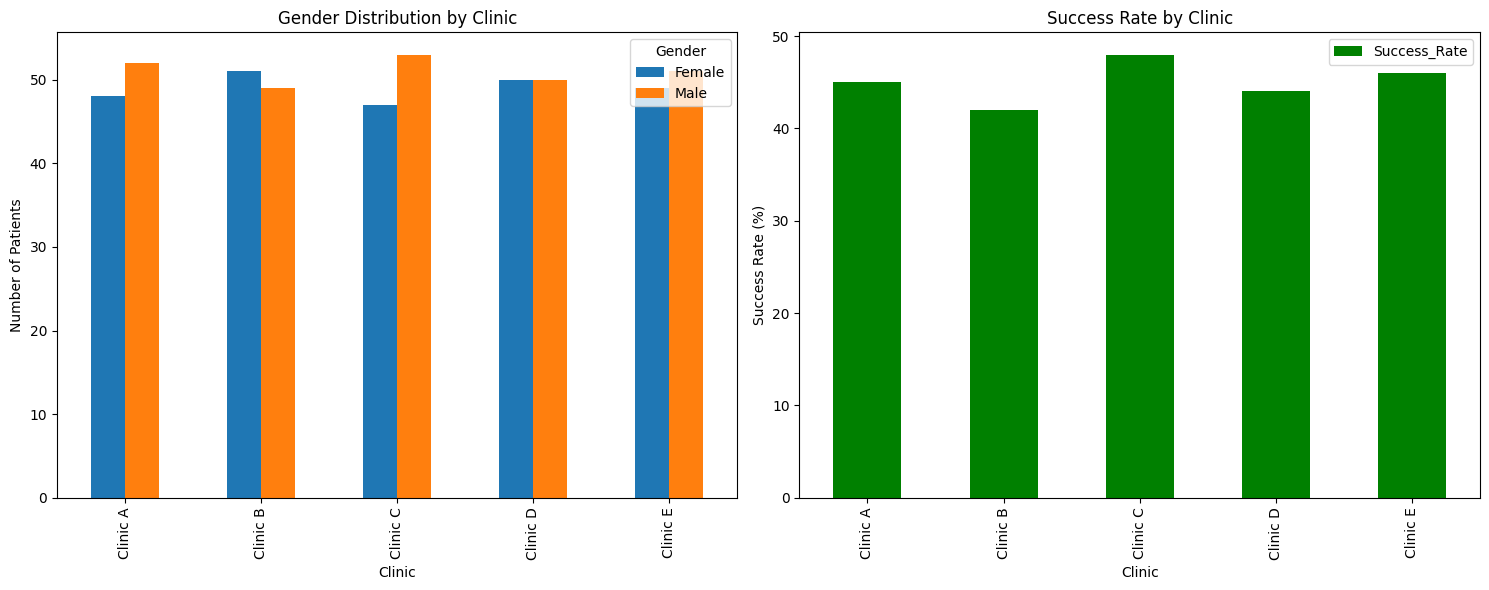

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Gender Distribution by Clinic
clinic_data.plot(x='Clinic', y=['Female', 'Male'], kind='bar', ax=ax1)
ax1.set_title('Gender Distribution by Clinic')
ax1.set_ylabel('Number of Patients')
ax1.legend(title='Gender')

# Plot 2: Success Rate by Clinic
discharge_data.plot(x='Clinic', y='Success_Rate', kind='bar', ax=ax2, color='green')
ax2.set_title('Success Rate by Clinic')
ax2.set_ylabel('Success Rate (%)')

plt.tight_layout()
plt.show()



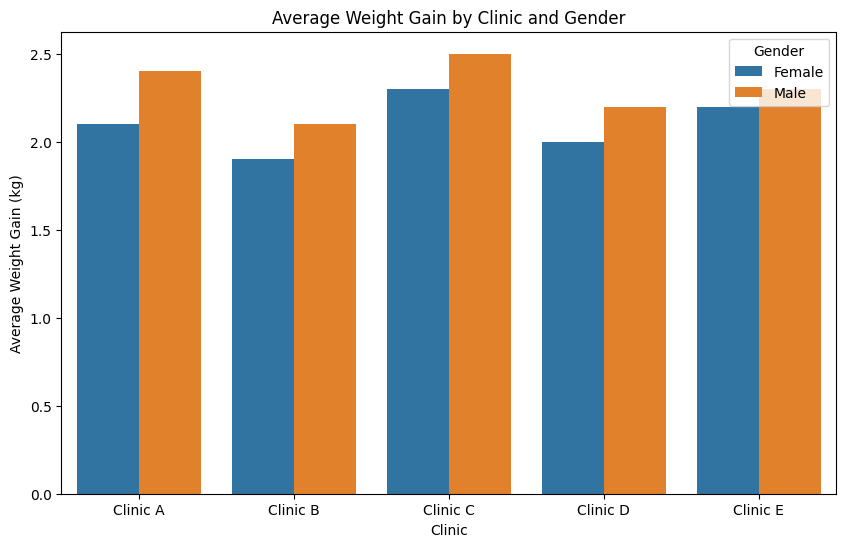

In [10]:
# Weight gain visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=weight_data, x='Clinic', y='Avg_Weight_Gain', hue='Gender')
plt.title('Average Weight Gain by Clinic and Gender')
plt.ylabel('Average Weight Gain (kg)')
plt.show()


In [8]:
# Save all data to CSV files
clinic_data.to_csv('clinic_analysis.csv', index=False)
weight_data.to_csv('weight_analysis.csv', index=False)
discharge_data.to_csv('discharge_analysis.csv', index=False)

print("All analysis files have been saved successfully.")


All analysis files have been saved successfully.
